In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import folium
from vincenty import vincenty

In [2]:
# Si la base de données n'est pas déjà téléchargée
# df0 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/3004168d-bec4-44d9-a781-ef16f41856a2', sep = '|')

# Sinon
df0 = pd.read_csv('valeursfoncieres-2019.txt', sep = '|')


/Users/lilianmarey/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# I. Nettoyage de la base de données

In [7]:
df1 = df0.copy()

# Option d'affchage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1.sample(5)

Code service CH  Reference document  1 Articles CGI  2 Articles CGI  \
543064               NaN                 NaN             NaN             NaN   
25914                NaN                 NaN             NaN             NaN   
43973                NaN                 NaN             NaN             NaN   
1470129              NaN                 NaN             NaN             NaN   
1811217              NaN                 NaN             NaN             NaN   

         3 Articles CGI  4 Articles CGI  5 Articles CGI  No disposition  \
543064              NaN             NaN             NaN               1   
25914               NaN             NaN             NaN               1   
43973               NaN             NaN             NaN               1   
1470129             NaN             NaN             NaN               1   
1811217             NaN             NaN             NaN               1   

        Date mutation                     Nature mutation Valeur fonciere  \
543064     31/12/2019                               Vente       210000,00   
25914      04/03/2019                               Vente        57000,00   
43973      12/08/2019                               Vente             NaN   
1470129    18/06/2019  Vente en l'état futur d'achèvement       242000,00   
1811217    27/03/2019                               Vente        72000,00   

         No voie B/T/Q Type de voie Code voie                   Voie  \
543064       6.0   NaN          NaN      B100              KERLIVIOU   
25914        6.0   NaN          NaN      0038  FERME DU MONT DE GUNY   
43973        NaN   NaN          NaN      B142            LES SAVARTS   
1470129    186.0   NaN          RUE      0650               DE LILLE   
1811217      NaN   NaN          NaN      B028           SAINT MICHEL   

         Code postal                  Commune Code departement  Code commune  \
543064       29350.0           MOELAN SUR MER               29           150   
25914         2300.0                     GUNY                2           363   
43973         2130.0          COULONGES-COHAN                2           220   
1470129      59250.0                  HALLUIN               59           279   
1811217      76430.0  SAINT-ROMAIN-DE-COLBOSC               76           647   

         Prefixe de section Section  No plan No Volume 1er lot  \
543064                  NaN      CK      329       NaN     NaN   
25914                   NaN      AK      506       NaN     NaN   
43973                   NaN      ZL       17       NaN     NaN   
1470129                 NaN      AS     1069       NaN     102   
1811217                 NaN      AH      525       NaN     NaN   

        Surface Carrez du 1er lot 2eme lot Surface Carrez du 2eme lot  \
543064                        NaN      NaN                        NaN   
25914                         NaN      NaN                        NaN   
43973                         NaN      NaN                        NaN   
1470129                       NaN      NaN                        NaN   
1811217                       NaN      NaN                        NaN   

        3eme lot Surface Carrez du 3eme lot  4eme lot  \
543064       NaN                        NaN       NaN   
25914        NaN                        NaN       NaN   
43973        NaN                        NaN       NaN   
1470129      NaN                        NaN       NaN   
1811217      NaN                        NaN       NaN   

        Surface Carrez du 4eme lot  5eme lot Surface Carrez du 5eme lot  \
543064                         NaN       NaN                        NaN   
25914                          NaN       NaN                        NaN   
43973                          NaN       NaN                        NaN   
1470129                        NaN       NaN                        NaN   
1811217                        NaN       NaN                        NaN   

         Nombre de lots  Code type local Type local  Identifiant local

## 1. Séléction des variables intéressantes

In [8]:
df1.columns

Index(['Code service CH', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [9]:
df = df1[[
        'Date mutation', 'Nature mutation', 'Valeur fonciere',
        'No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
        'Commune', 'Code departement', 'Code commune', 'Type local',
        'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain'
        ]]

df.sample(5)

Date mutation Nature mutation Valeur fonciere  No voie Type de voie  \
408194     24/05/2019           Vente       117000,00     49.0          RUE   
789821     27/06/2019           Vente       470000,00      NaN          IMP   
1605460    15/04/2019           Vente        75000,00      NaN          NaN   
2204855    19/12/2019           Vente        76000,00     28.0          RUE   
1100616    09/07/2019           Vente       260000,00      4.0          RUE   

        Code voie                     Voie  Code postal  \
408194       1190           DE LA CORNICHE      22000.0   
789821       0114          DU GRAND CHEMIN      34270.0   
1605460      B005                   BANSON      63460.0   
2204855      0302            DES MURAILLES      89310.0   
1100616      1238  JEAN CLAUDE MAISONNEUVE      44220.0   

                           Commune Code departement  Code commune Type local  \
408194                SAINT-BRIEUC               22           278     Maison   
789821   SAINT-MATHIEU-DE-TREVIERS               34           276        NaN   
1605460                  COMBRONDE               63           116        NaN   
2204855                     ETIVEY               89           161     Maison   
1100616                    COUERON               44            47     Maison   

         Surface reelle bati  Nombre pieces principales  Surface terrain  
408194                  54.0                        4.0            397.0  
789821                   NaN                        NaN           2300.0  
1605460                  NaN                        NaN            139.0  
2204855                 96.0                        5.0           1158.0  
1100616                 84.0                        4.0            181.0

### Premier tri pour garder les biens qui nous intéressent dans le cadre que l'on s'est donné

In [10]:
df = df[df['Nature mutation'] == 'Vente']
df = df[df['Code departement'] == 75]
df = df[df['Type local'] == 'Appartement']
df = df[pd.isna(df['Surface terrain'])] # Vu qu'on va essayer de prédir un prix au m2, la surface est une donnée indispensable

### Changement du nom des variables

In [11]:
df = df[[
        'Date mutation', 'Valeur fonciere', 'No voie', 
        'Type de voie', 'Voie', 'Code postal', 'Surface reelle bati', 
        'Nombre pieces principales',
        'Code departement', 'Code commune', 'Code voie',
        'Type local'
        ]]

df = df.rename(columns = {
                            'Date mutation': 'Date', 
                            'Valeur fonciere': 'Valeur',
                            'Type de voie': 'TypeVoie',
                            'No voie': 'Numero',
                            'Code postal': 'CodePostal',
                            'Surface reelle bati': 'Surface',
                            'Nombre pieces principales': 'NbPieces',
                            'Surface terrain': 'SurfaceTerrain',
                            'Code departement': 'Code_departement', 
                            'Code commune': 'Code_commune', 
                            'Code voie': 'Code_voie',
                            'Type local': 'TypeLocal'
                         }
              )

## 2. Gestion des variables

In [12]:
df.dtypes

Date                 object
Valeur               object
Numero              float64
TypeVoie             object
Voie                 object
CodePostal          float64
Surface             float64
NbPieces            float64
Code_departement     object
Code_commune          int64
Code_voie            object
TypeLocal            object
dtype: object

On remarque que la variable "Valeur" n'est pas de type float ou int, il va falloir y remédier !

### Valeur

In [13]:
# Les biens dont la valeur n'est pas renseignée ne nous intéressent pas
df = df.dropna(subset = ['Valeur'])

# Changement des virgules en point pour pouvoir convertir les types str en types float
df['Valeur'] = df.apply(lambda row : str(row.Valeur).replace(',', '.'), axis = 1)
df['Valeur'] = pd.to_numeric(df['Valeur'])

# On divise par 1000 les prix pour plus de lisibilité
df['Valeur'] = df['Valeur']/1000

# On se concentre sur une tranche de prix "raisonnable"
df = df[df['Valeur'] > 60]
df = df[df['Valeur'] < 15000]

# Pour déterminer ces bornes, nous sommes allé sur des sites d'immobiliers à Paris pour trouver les valeurs extrêmes

### Surface

Un logement mis en location doit respecter une surface minimum. Il s'agit d'un des critères de décence du logement.

Le logement doit comporter au moins une pièce principale présentant :

une surface habitable de 9 m² et une hauteur sous plafond minimale de 2,20 mètres,
ou un volume habitable de 20 m³.

In [14]:
df = df[df['Surface'] >= 9]

### Création de la variable du prix par metre carré (prixm2)

In [15]:
df['prixm2'] = df['Valeur'] / df['Surface']

### Date

In [16]:
display(df.sort_values('Date')[['Date']].head())
df[pd.isna(df['Date'])].shape

# Il ne semble pas y avoir de valeurs manquantes

Date
2519832  01/02/2019
2478301  01/02/2019
2482940  01/02/2019
2482948  01/02/2019
2482963  01/02/2019

(0, 13)

### Elements d'adresse (Numero, TypeVoie,  Voie, CodePostal)

In [17]:
# Numero
print(df[pd.isna(df['Numero'])].shape)

# Tous les appartments ont un numéro indiqué. On est satisfait car on souhaite une localisation précise des appartements

(0, 13)


In [18]:
# TypeVoie

print(df[pd.isna(df['TypeVoie'])].shape)

# 15 valeurs manquantes, on regarde à quoi elles correspondent

display(df[pd.isna(df['TypeVoie'])])

# Cela correspond à des adresses où le type de voie est spécial (Villa, Pont, Autoroute, Rond point) 
# et est contenu dans la variable Voie
# On laisse comme ca

(15, 13)


Date  Valeur  Numero TypeVoie                        Voie  \
2478666  28/02/2019  429.70    30.0      NaN     VIL WAGRAM SAINT HONORE   
2495603  03/06/2019  896.60     3.0      NaN                        N 11   
2500112  03/07/2019  217.00     4.0      NaN        ALLEE DES HORTENSIAS   
2501436  14/02/2019  339.70     3.0      NaN  VLA HONORE GABRIEL RIQUETI   
2501524  13/02/2019  250.00     6.0      NaN        VIL DU MONT TONNERRE   
2501686  13/02/2019  970.00     7.0      NaN            DU PONT MIRABEAU   
2502474  15/04/2019  309.06     3.0      NaN        VIL DU MONT TONNERRE   
2503541  10/05/2019  856.00  9003.0      NaN             METRO BOUCICAUT   
2504640  12/07/2019  860.00     7.0      NaN  VLA HONORE GABRIEL RIQUETI   
2504703  16/07/2019  570.00   158.0      NaN           R-PTSAINT CHARLES   
2505389  27/08/2019  922.33     7.0      NaN            DU PONT MIRABEAU   
2505447  12/09/2019  794.00    10.0      NaN  VLA HONORE GABRIEL RIQUETI   
2505729  18/09/2019   65.00     7.0      NaN            DU PONT MIRABEAU   
2506481  08/11/2019  918.00     7.0      NaN            DU PONT MIRABEAU   
2527197  27/03/2019  731.40     4.0      NaN                        Z 20   

         CodePostal  Surface  NbPieces Code_departement  Code_commune  \
2478666     75008.0     41.0       1.0               75           108   
2495603     75011.0    100.0       3.0               75           111   
2500112     75014.0     18.0       1.0               75           114   
2501436     75015.0     31.0       1.0               75           115   
2501524     75015.0     25.0       1.0               75           115   
2501686     75015.0    120.0       4.0               75           115   
2502474     75015.0     21.0       2.0               75           115   
2503541     75015.0     78.0       4.0               75           115   
2504640     75015.0     80.0       3.0               75           115   
2504703     75015.0     70.0       2.0               75           115   
2505389     75015.0    110.0       4.0               75           115   
2505447     75015.0     67.0       2.0               75           115   
2505729     75015.0      9.0       1.0               75           115   
2506481     75015.0     95.0       3.0               75           115   
2527197     75020.0     85.0       4.0               75           120   

        Code_voie    TypeLocal     prixm2  
2478666      9936  Appartement  10.480488  
2495603      X421  Appartement   8.966000  
2500112      R072  Appartement  12.055556  
2501436      4648  Appartement  10.958065  
2501524      6539  Appartement  10.000000  
2501686      7616  Appartement   8.083333  
2502474      6539  Appartement  14.717143  
2503541      S049  Appartement  10.974359  
2504640      4648  Appartement  10.750000  
2504703      8512  Appartement   8.142857  
2505389      7616  Appartement   8.384818  
2505447      4648  Appartement  11.850746  
2505729      7616  Appartement   7.222222  
2506481      7616  Appartement   9.663158  
2527197      X670  Appartement   8.604706

In [19]:
# Voie
display(df.sort_values('Voie')[['Voie']].head())
print(df[pd.isna(df['Voie'])].shape)

# Il ne semble pas y avoir de valeurs manquantes

Voie
2493978             A 11
2528149            AB 20
2532159            AB 20
2494739             ABEL
2497687  ABEL HOVELACQUE

(0, 13)


In [20]:
# CodePostal

print(df[pd.isna(df['CodePostal'])].shape)

# 1 valeur manquante, on regarde à quoi elle correspond

display(df[pd.isna(df['CodePostal'])])

# La rue de l'Abbé Groult se situe dans le 15ème, on remplit à la main

df.at[2503844, 'CodePostal'] = float(75015)

display(df.loc[[2503844]])

(1, 13)


Date  Valeur  Numero TypeVoie              Voie  CodePostal  \
2503844  23/05/2019   150.0    23.0      RUE  DE L ABBE GROULT         NaN   

         Surface  NbPieces Code_departement  Code_commune Code_voie  \
2503844     19.0       1.0               75           115      0012   

           TypeLocal    prixm2  
2503844  Appartement  7.894737

Date  Valeur  Numero TypeVoie              Voie  CodePostal  \
2503844  23/05/2019   150.0    23.0      RUE  DE L ABBE GROULT     75015.0   

         Surface  NbPieces Code_departement  Code_commune Code_voie  \
2503844     19.0       1.0               75           115      0012   

           TypeLocal    prixm2  
2503844  Appartement  7.894737

### NbPieces (nombre de pièces)

In [21]:
print(df[pd.isna(df['NbPieces'])].shape)

display(df.sort_values('NbPieces')[['NbPieces']].head())

# Pas de valeurs manquantes mais des appartements à 0 pièces...

display(df[df['NbPieces'] == 0].head())

# Les entrées n'ont pas l'air des anomalies, la valeur doit être manquante, on laisse tel quel en gardant à l'esprit cette observation

(0, 13)


NbPieces
2483400       0.0
2490090       0.0
2515185       0.0
2499758       0.0
2509412       0.0

Date  Valeur  Numero TypeVoie             Voie  CodePostal  \
2479736  17/06/2019  346.75    10.0      RUE  SAINTE ANASTASE     75003.0   
2480202  12/07/2019  120.00    17.0       BD     SAINT MARTIN     75003.0   
2480249  02/07/2019  342.50    22.0      RUE      DE PICARDIE     75003.0   
2482477  17/12/2019  774.60     6.0      RUE  SAINT FLORENTIN     75001.0   
2483400  12/03/2019  169.85    54.0      RUE   HENRI BARBUSSE     75005.0   

         Surface  NbPieces Code_departement  Code_commune Code_voie  \
2479736     29.0       0.0               75           103      8531   
2480202     18.0       0.0               75           103      8692   
2480249     12.0       0.0               75           103      7395   
2482477     18.0       0.0               75           101      8611   
2483400     31.0       0.0               75           105      4535   

           TypeLocal     prixm2  
2479736  Appartement  11.956897  
2480202  Appartement   6.666667  
2480249  Appartement  28.541667  
2482477  Appartement  43.033333  
2483400  Appartement   5.479032

#### Création de la variable 'id' qui permettra d'identifier l'adresse précise dans une autre bdd

In [22]:
def code_numero(numero):
    """Créé le code utilisé pour identifier le numero d'une rue au sein du code 'id' 

    Argument :
    numero : float
        numero de la rue tel que présent dans la base de données

    Return :
    code : str
        Le code correspondant (format 00007 pour le numéro 7 d'une rue, par exemple)
    """

    code = str(int(numero))
    code = '0' * (5 - len(code)) + code

    return code

df['id'] = df['Code_departement'].astype(str) + df['Code_commune'].astype(str) + '_' + df['Code_voie'].astype(str) + '_' + df['Numero'].apply(code_numero)

df = df.drop(columns = ['Code_commune', 'Code_departement', 'Code_voie'])

# Vérification

df.head(5)

Date   Valeur  Numero TypeVoie             Voie  CodePostal  \
2478017  04/01/2019  1196.00    17.0      RUE           DUPHOT     75001.0   
2478018  03/01/2019  1570.49    13.0      RUE      DE THORIGNY     75003.0   
2478022  10/01/2019   230.00     4.0      RUE          BLONDEL     75003.0   
2478024  05/01/2019   955.75    82.0       BD      MALESHERBES     75008.0   
2478025  07/01/2019   506.80     4.0     CITE  DUPETIT THOUARS     75003.0   

         Surface  NbPieces    TypeLocal     prixm2                id  
2478017    112.0       3.0  Appartement  10.678571  75101_2999_00017  
2478018    104.0       3.0  Appartement  15.100865  75103_9298_00013  
2478022     26.0       1.0  Appartement   8.846154  75103_1021_00004  
2478024     80.0       3.0  Appartement  11.946875  75108_5951_00082  
2478025     45.0       2.0  Appartement  11.262222  75103_2996_00004

In [23]:
# Petite sauvegadre de la base à ce stade

dfv0 = df.copy()

## 3. Choix de la variable à prédir

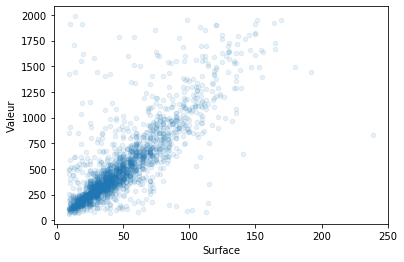

In [24]:
# On peut tracer le prix en fonction de la surface

df[df['Valeur'] < 2000].sample(2000).plot(x = 'Surface', y = 'Valeur', kind = 'scatter', alpha = .1)
# On a tracé le graphe pour les appartements ayant un prix inférieur à 2 millions

On voit une relation linéaire apparaitre, justifiée par un coefficient de corrélation significatif, de 0.58 

In [25]:
df['Valeur'].corr(df['Surface'])

0.5773341774970066

#### On fait donc l'hypothèse qu'il y a une corélation linéaire entre le prix d'un appartement et sa surface en m2.
#### On se donnera donc pour objectif de prédir le prix au m2 d'un appartement en fonction de différents paramètres.

## 4. Gestion des anomalies

La base de données n'est pas parfaite, certaines entrées sont erronées.
La premier nettoyage que nous allons faire, qui est aussi le plus grossier, est de se restreindre à des prix au m2 raisonnables.
#### Le site meilleursagents.com recense les prix au m2 de nombreux appartements à Paris. 
#### Les prix les plus bas observé sont environ de 4 700 €/m2
#### Les prix les plus hauts observés sont environ de 32 000 €/m2

#### On choisit donc de considérer les biens dont le prix au m2 est compris entre 4 230 € et 35 200 (marge de 10%)

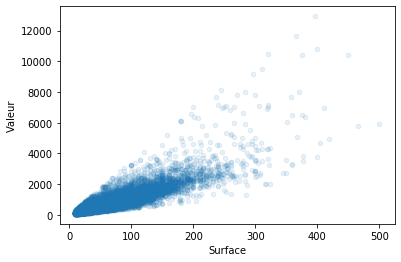

In [26]:
df = df[df['prixm2'] > 4.23]
df = df[df['prixm2'] < 35.2]

df.plot(x = 'Surface', y = 'Valeur', kind = 'scatter', alpha = .1)

# Couplage avec la base des données GPS

On souhaite obtenir les coordonnées GPS de tous les appartements présents dans la base.
Pour cela, nous avons trouvé une base de données qui répertorient toutes les adresses parisiennes et leur associe des coordonnées GPS.
Pour coupler les deux bases, nous utiliserons la variable id.
Ce code id est de la forme WWXXX_YYYY_ZZZZZ avec : 	
##### WW est le code département (75 ici)
##### XXX est le code commune (115 pour le 15ème arrondissement)
##### YYYY est le code voie (4903 pour l'avenue Jean Jaurès par exemple)
##### ZZZZ est le numéro (00005 pour le 5)


In [27]:
df2 = pd.read_csv('https://adresse.data.gouv.fr/data/ban/adresses/latest/csv/adresses-75.csv.gz', sep = ';').copy()

In [29]:
df2.sample(5)

id  id_fantoir  numero  rep           nom_voie  \
55798  75114_2241_00004  75114_2241       4  NaN  Rue du Commandeur   
29878  75109_6541_00009  75109_6541       9  NaN     Rue de Montyon   
90967  75118_2534_00081  75118_2534      81  NaN      Rue Damrémont   
57715  75112_8575_00015  75112_8575      15  NaN    Cour Saint-eloi   
96189  75118_7755_00056  75118_7755      56  NaN      Rue du Poteau   

       code_postal  code_insee               nom_commune  \
55798        75014       75114  Paris 14e Arrondissement   
29878        75009       75109   Paris 9e Arrondissement   
90967        75018       75118  Paris 18e Arrondissement   
57715        75012       75112  Paris 12e Arrondissement   
96189        75018       75118  Paris 18e Arrondissement   

       code_insee_ancienne_commune  nom_ancienne_commune          x  \
55798                          NaN                   NaN  650955.35   
29878                          NaN                   NaN  651901.13   
90967                          NaN                   NaN  651317.80   
57715                          NaN                   NaN  655150.47   
96189                          NaN                   NaN  651654.71   

                y       lon        lat  alias  nom_ld libelle_acheminement  \
55798  6858942.49  2.331928  48.828673    NaN     NaN                PARIS   
29878  6863867.66  2.344253  48.873036    NaN     NaN                PARIS   
90967  6866130.39  2.336041  48.893340    NaN     NaN                PARIS   
57715  6860981.50  2.388855  48.847316    NaN     NaN                PARIS   
96189  6866314.35  2.340615  48.895020    NaN     NaN                PARIS   

               nom_afnor source_position source_nom_voie  
55798  RUE DU COMMANDEUR         commune         commune  
29878     RUE DE MONTYON         commune         commune  
90967      RUE DAMREMONT         commune         commune  
57715    COUR SAINT ELOI         commune         commune  
96189      RUE DU POTEAU         commune         commune

### Séléction des variables intéressantes

In [30]:
df_GPS = df2[[
        'id', 'lon', 'lat', 
        ]]

# x et y : Coordonnées cartographique en projection légale
# lon et lat : Coordonnées en WGS-84	

df_GPS.sample(10)

id       lon        lat
49580   75114_4049_00001  2.306856  48.826927
131750  75116_8450_00022  2.282770  48.864984
85755   75117_1550_00180  2.317723  48.890652
146514  75115_7968_00011  2.298507  48.844178
5436    75101_6407_00028  2.336584  48.865501
33289   75110_3516_00006  2.352949  48.870063
124888  75116_9860_00042  2.286280  48.861300
130927  75116_4029_00036  2.257868  48.841806
134710  75115_5482_00008  2.278749  48.842683
118734  75113_4034_00067  2.379782  48.824824

### Couplage avec df

In [31]:
print(df.shape)
df = df.merge(df_GPS, left_on = 'id', right_on = 'id')
print(df.shape)

display(df.sample(10))

(29761, 11)
(29676, 13)


Date   Valeur  Numero TypeVoie                Voie  CodePostal  \
7980   04/03/2019   970.00    83.0       BD      RICHARD LENOIR     75011.0   
1577   20/09/2019  1700.00    17.0      RUE          DE MONCEAU     75008.0   
23676  20/12/2019   430.44    35.0      RUE               LABAT     75018.0   
33     11/01/2019   752.40    26.0      RUE          MONTMARTRE     75001.0   
1351   26/07/2019   555.80    16.0      RUE     DUPETIT THOUARS     75003.0   
16178  17/07/2019   114.00     1.0       SQ       DES ALISCAMPS     75016.0   
6810   29/11/2019   963.67    11.0      RUE          DE LONDRES     75009.0   
27874  02/09/2019   365.00    78.0      RUE      JULIEN LACROIX     75020.0   
4757   30/09/2019   380.00    26.0      RUE  DE SAMBRE ET MEUSE     75010.0   
21494  22/07/2019   430.00    33.0      RUE              SIMART     75018.0   

       Surface  NbPieces    TypeLocal     prixm2                id       lon  \
7980      96.0       3.0  Appartement  10.104167  75111_8208_00083  2.372123   
1577     134.0       5.0  Appartement  12.686567  75108_6419_00017  2.307267   
23676     59.0       3.0  Appartement   7.295593  75118_5188_00035  2.348835   
33        75.0       3.0  Appartement  10.032000  75101_6513_00026  2.345559   
1351      16.0       1.0  Appartement  34.737500  75103_2997_00016  2.361545   
16178     13.0       1.0  Appartement   8.769231  75116_0202_00001  2.260418   
6810      86.0       4.0  Appartement  11.205465  75109_5741_00011  2.329778   
27874     34.0       2.0  Appartement  10.735294  75120_5112_00078  2.382294   
4757      38.0       2.0  Appartement  10.000000  75110_8801_00026  2.371475   
21494     45.0       3.0  Appartement   9.555556  75118_8976_00033  2.347017   

             lat  
7980   48.861417  
1577   48.876011  
23676  48.889195  
33     48.864215  
1351   48.865613  
16178  48.851877  
6810   48.876843  
27874  48.872757  
4757   48.874745  
21494  48.891421

On peut donc maintenant représenter les appartements dans un plan de Paris.

In [44]:
fig = px.scatter(df[df['prixm2'] < 20].sample(9000), x = 'lon', y = 'lat',
              color = 'prixm2',  width = 800, height = 627, opacity = .4, template = 'simple_white', color_continuous_scale = ['rgb(255,255,0)', 'rgb(255,0,0)'])
fig.show()

On constate bien les faits stylisé déjà connu : 
#### Les quartiers périphériques sont en général moins chers que les quartiers centraux.
#### Les quartiers de l'ouest sont plus chers que ceux à l'est.

In [47]:
# Affichage dns un fond de carte

map_osm = folium.Map(location = [48.853332, 2.348776], tiles = 'CartoDB dark_matter', zoom_start = 12.2)

paliers = np.linspace(4.23, 20, 10)

df_test = df[df['prixm2'] < 20].sample(3000)

for i in range(9):

    df_pal = df_test[df_test['prixm2'] < paliers[i + 1]]
    df_pal = df_test[df_test['prixm2'] > paliers[i]]

    couleur = 'rgb(' + str(255) + ',' + str(255 * (10 - i) / 10) + ',' + str(0) + ')'

    for lat, lon in [(row.lat, row.lon) for _, row in df_pal.iterrows()]:
        map_osm.add_child(folium.CircleMarker(location = [lat, lon], radius = 1, color = couleur))

map_osm

In [48]:
# Sauvegarde de la base
dfv1 = df.copy()

# II. Traitement des données - ajout de variables


In [49]:
df_ml = df.drop(columns = ['Date', 'Valeur', 'Surface', 'Numero', 'TypeVoie', 'Voie', 'CodePostal', 'TypeLocal', 'id'])
df_ml.head()

NbPieces     prixm2       lon        lat
0       3.0  10.678571  2.325456  48.868446
1       3.0  15.100865  2.363265  48.860077
2       1.0  10.293939  2.363265  48.860077
3       1.0  13.416667  2.363265  48.860077
4       1.0   8.846154  2.354921  48.868529

In [50]:
corr_matrix = df_ml.corr()
corr_matrix["prixm2"].sort_values(ascending = False)
# les variables sont toutes plutôt décorélées avec le prix au m2

prixm2      1.000000
NbPieces    0.052549
lat        -0.060936
lon        -0.158746
Name: prixm2, dtype: float64

## Base de donnée des monuments

In [51]:
df_monuments = pd.read_csv('/Users/lilianmarey/Desktop/Python/PrixImmobilier/monuments.csv', sep = ';')

# On standardise le nombre de visiteurs
df_monuments['visiteurs']/=max(df_monuments['visiteurs'])


In [52]:
df_monuments.head()

nom  visiteurs        lat       lon
0                       Musée du Louvre   0.750000  48.860546  2.337612
1                       Centre Pompidou   0.261143  48.860637  2.352224
2                         Musée d'Orsay   0.241634  48.859959  2.326570
3  Cité des Sciences et de l'Industrie    0.162735  48.895373  2.387874
4  Musée National d'Histoire Naturelle    0.149731  48.843347  2.363467

### Calcul du score de proximité aux monuments

In [53]:
def calcule_scores_monument(lat,lon):

    distances_aux_monuments = []

    for i,row in df_monuments.iterrows():
        distances_aux_monuments.append((row.nom, row.visiteurs, vincenty((row.lat, row.lon), (lat, lon))))

    try:
        score_1 = max([monument[1] for monument in distances_aux_monuments if monument[2] < .5])
    except:
        score_1 = 0

    try:
        score_2 = len([monument[1]/monument[2] for monument in distances_aux_monuments if monument[2] < 3])
    except:
        score_2 = 0

    return score_1, score_2

In [54]:
L1, L2 = [],[]
for _, row in df_ml.iterrows():
    (a,b) = calcule_scores_monument(row.lat, row.lon)
    L1.append(a)
    L2.append(b)

In [55]:
df_ml['score_1'], df_ml['score_2'] = L1, L2

df_ml['score_2'] /= max(df_ml['score_2'])

df_ml['score_monument'] = ( (1/5) * df_ml['score_1'] + (4/5) * df_ml['score_2'] ) 

df_ml = df_ml.drop(columns = ['score_1', 'score_2'])
df_ml.head()

NbPieces     prixm2       lon        lat  score_monument
0       3.0  10.678571  2.325456  48.868446            0.80
1       3.0  15.100865  2.363265  48.860077            0.35
2       1.0  10.293939  2.363265  48.860077            0.35
3       1.0  13.416667  2.363265  48.860077            0.35
4       1.0   8.846154  2.354921  48.868529            0.50

In [56]:
map_osm = folium.Map(location = [48.853332, 2.348776], tiles = 'CartoDB dark_matter', zoom_start = 12.2)

df_ml = df_ml.sort_values(by = 'score_monument', ascending = False)

for lat, lon in [(row.lat, row.lon) for _, row in df_ml.head(200).iterrows()]:
    map_osm.add_child(folium.CircleMarker(location = [lat, lon], radius = 1))

map_osm